In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=20)

In [3]:
X

array([[  8.7216425 ,   6.89554964],
       [ -7.6436496 ,   3.84304447],
       [  0.34542657,   8.95474776],
       ...,
       [-10.02187868,   3.42732685],
       [  7.57129639,   5.512267  ],
       [  1.29248349,   9.89902206]])

In [4]:
y

array([1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
       2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0,

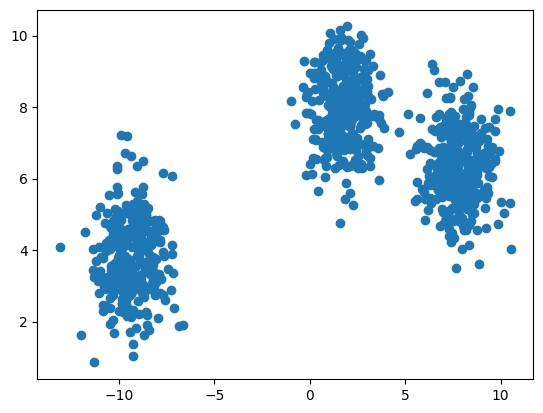

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.25)

In [8]:
from sklearn.cluster import KMeans

In [9]:
## Elbow method to select K Value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/si

In [10]:
wcss

[41105.7096682419,
 6291.843279118624,
 1480.927570317526,
 1286.7957089599863,
 1131.086440399781,
 961.3210304564885,
 852.4677433951301,
 748.3168139149169,
 649.515920585692,
 596.1945786096421]

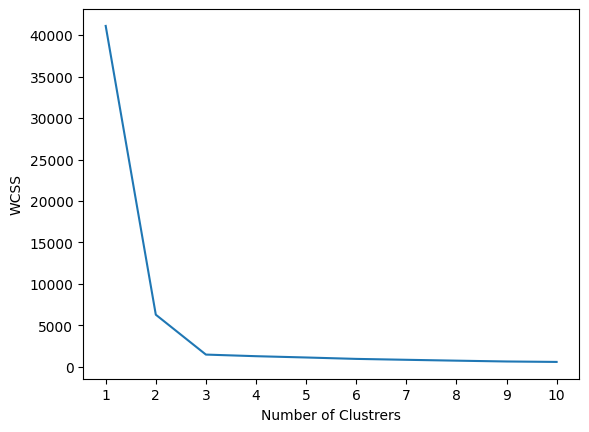

In [11]:
# plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [13]:
y_labels = kmeans.fit_predict(X_train)

/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


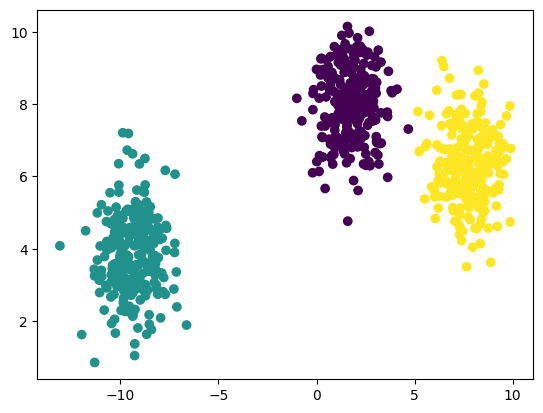

In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

In [15]:
# !pip install kneed

In [16]:
from kneed import KneeLocator

In [17]:
k1 = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing');
k1.elbow

3

In [18]:
# Silhoutte score
from sklearn.metrics import silhouette_score

In [19]:
silhouette_cofficient = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_cofficient.append(score)

/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anmol/.local/lib/python3.10/si

In [20]:
silhouette_cofficient

[0.7651661933051455,
 0.7622783220492386,
 0.5918073852028328,
 0.44626796001756447,
 0.3223337248964055,
 0.3408418582728939,
 0.34336709047921044,
 0.34440082006861866,
 0.3462437415881186]

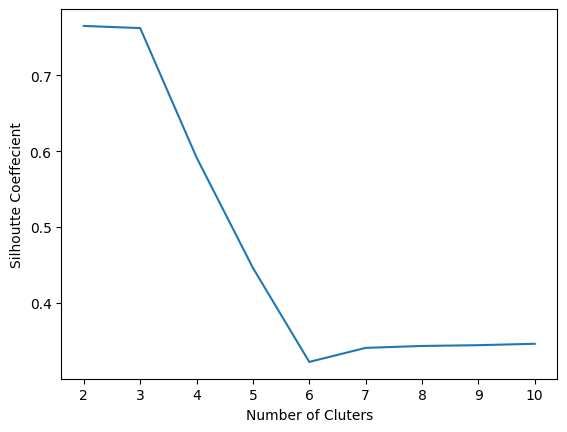

In [23]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_cofficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()